In [1]:
from read_clustering.variant_call import VariantCalls
threshold = 0.5
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
import re
from scipy.stats import pearsonr
from pathlib import Path

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, cophenet, cut_tree
from scipy.spatial.distance import pdist
from sklearn.metrics.cluster import adjusted_mutual_info_score
from sklearn import metrics
import sys
sys.setrecursionlimit(10000)
import os

/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/umap/__init__.py:9: UserWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn("Tensorflow not installed; ParametricUMAP will be unavailable")
/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# final ivt vs native
CBF5GAL = "modification_calls/20190610_R941_CBF5GAL.csv"
CBF5GLU = "modification_calls/20190611_R941_CBF5GLU.csv"
NOP58GAL = "modification_calls/20190617_R941_NOP58GAL.csv"
NOP58GLU = "modification_calls/20190619_R941_NOP58GLU.csv"
IVT = "modification_calls/20191014_R941_IVT.csv"
mutant448 = "modification_calls/20210405_R941_mutant448.csv"
WT_YPD = "modification_calls/20210410_R941_WT_YPD.csv"
WT_KOAC = "modification_calls/20210412_R941_WT_KOAC.csv"
mutant452 = "modification_calls/20210413_R941_mutant452.csv"
WT_CY = "modification_calls/20210414_R941_WT_CY.csv"
mutant451 = "modification_calls/20210415_R941_mutant451.csv"
WT_PB = "modification_calls/20210520_R941_WT_PB.csv"
WT_stationary = "modification_calls/20210521_R941_WT_stationary.csv"
Dbp3d_YPD = "modification_calls/20210527_R941_Dbp3d_YPD.csv"
trl1d_YPD = "modification_calls/20210528_R941_trl1d_YPD.csv"
WT_rapa5 = "modification_calls/20210531_R941_WT_rapa5.csv"
Mix = "modification_calls/20210618_R941_Mix.csv"
prp43 = "modification_calls/20210619_R941_prp43.csv"
MIX_2 = "modification_calls/20210716_R941_MIX.csv"
YS603_18_YEPD = "modification_calls/20210717_R941_YS603_18_YEPD.csv"
prp16_18deg_YPD = "modification_calls/20210719_R941_prp16_18deg_YPD.csv"
spp382_YPD = "modification_calls/20210720_R941_spp382_YPD.csv"
R941_YS602_18_YPD = "modification_calls/20210722_R941_R941_YS602_18_YPD.csv"
dbr1d_YPD = "modification_calls/20210729_R941_dbr1d_YPD.csv"
sqs1d_YPD = "modification_calls/20210730_R941_sqs1d_YPD.csv"
snR4d_YPD = "modification_calls/20210823_R941_snR4d_YPD.csv"
snR45d_YPD = "modification_calls/20210824_R941_snR45d_YPD.csv"
mutant448_2 = "modification_calls/20210825_R941_mutant448.csv"
snR4d_alpha_YPD = "modification_calls/20210902_R941_snR4d_alpha_YPD.csv"
WT_YPD2 = "modification_calls/20210930_R941_YS602_WT_repeat2.csv"
WT_YPD3 = "modification_calls/20211001_R941_YS602_WT_repeat3.csv"
prx1 = "modification_calls/20211006_R941_pxr1d_YPD.csv"

In [10]:
# snoRNA mix 
all_file_paths = [Dbp3d_YPD, prp43, prx1, WT_YPD] 
all_labels = ["Dbp3d_YPD", "prp43", "prx1", "WT_YPD"] 
vc = VariantCalls(all_file_paths, all_labels, color_map="Set1")


<IPython.core.display.Javascript object>


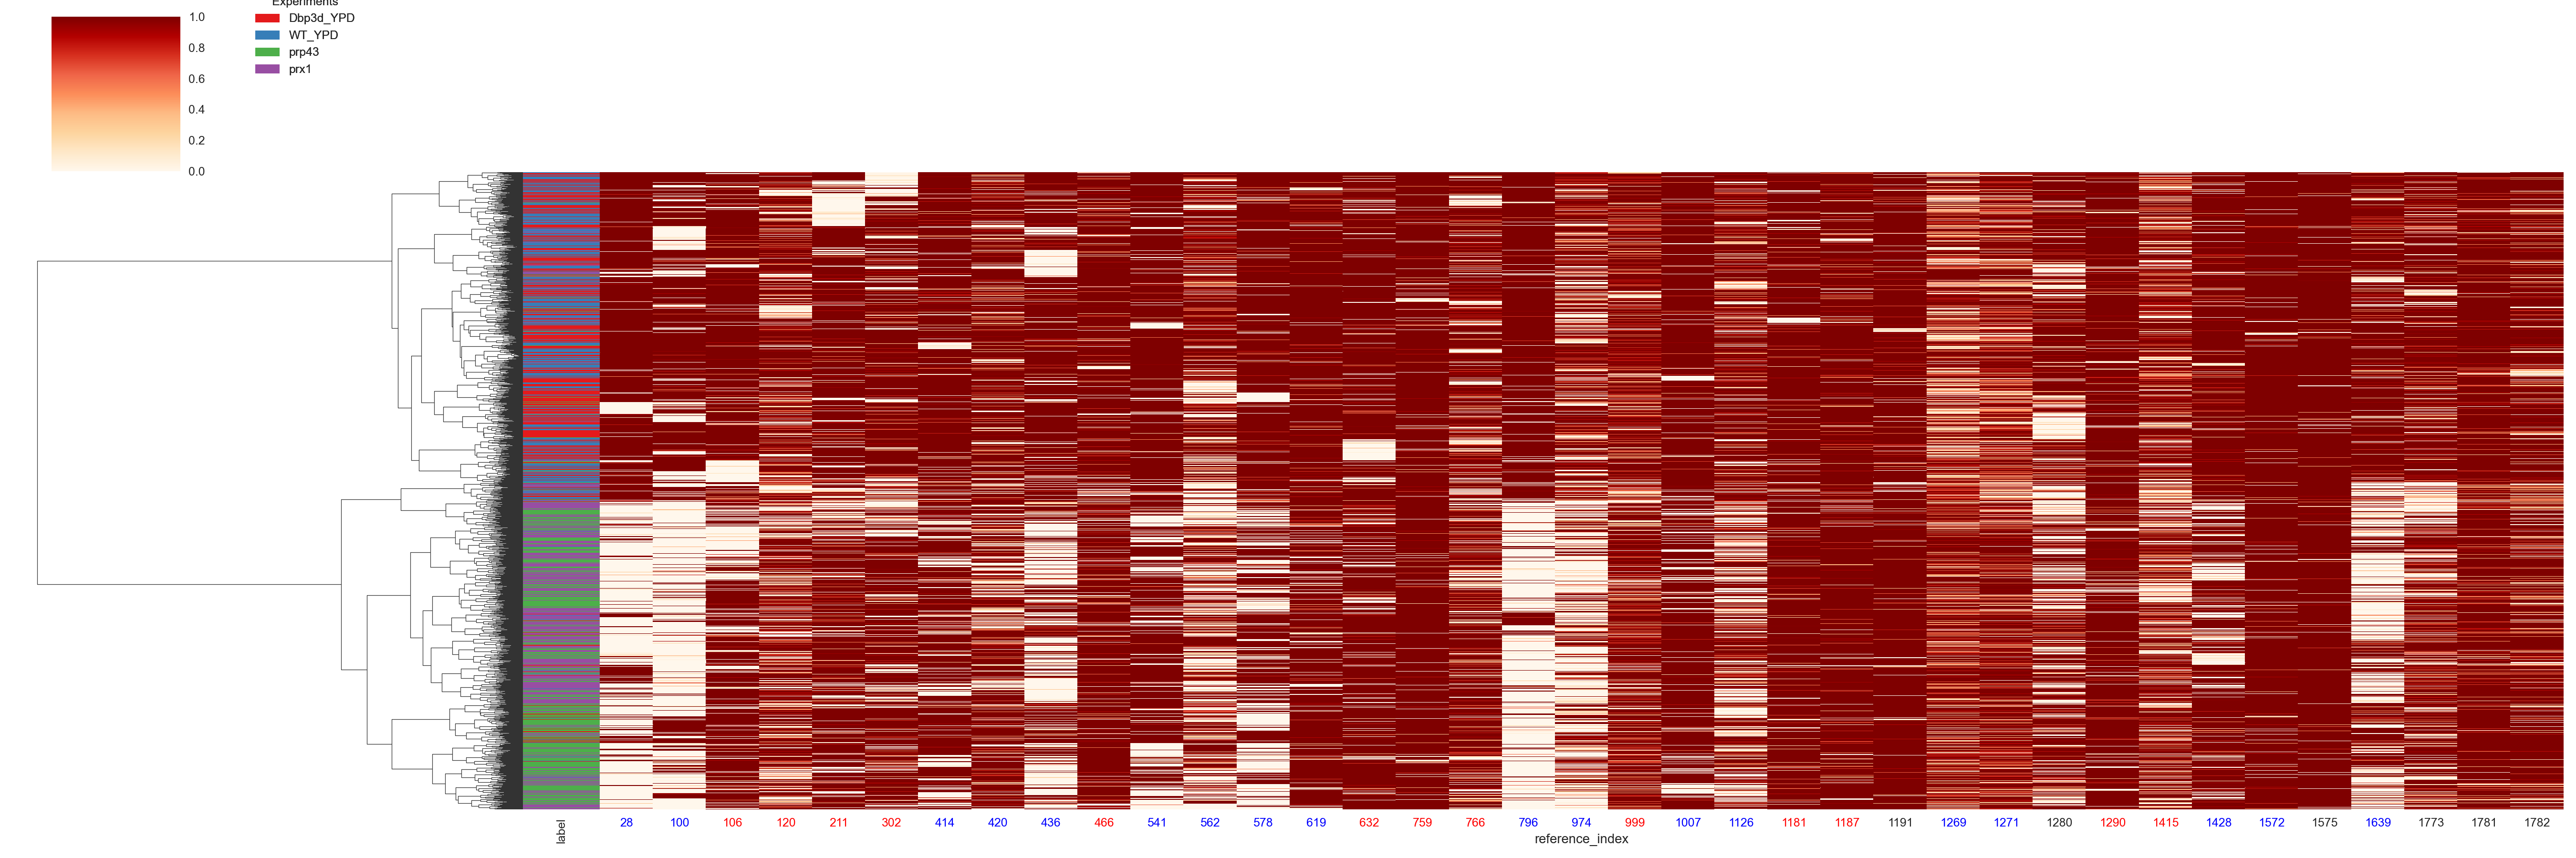

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<IPython.core.display.Javascript object>


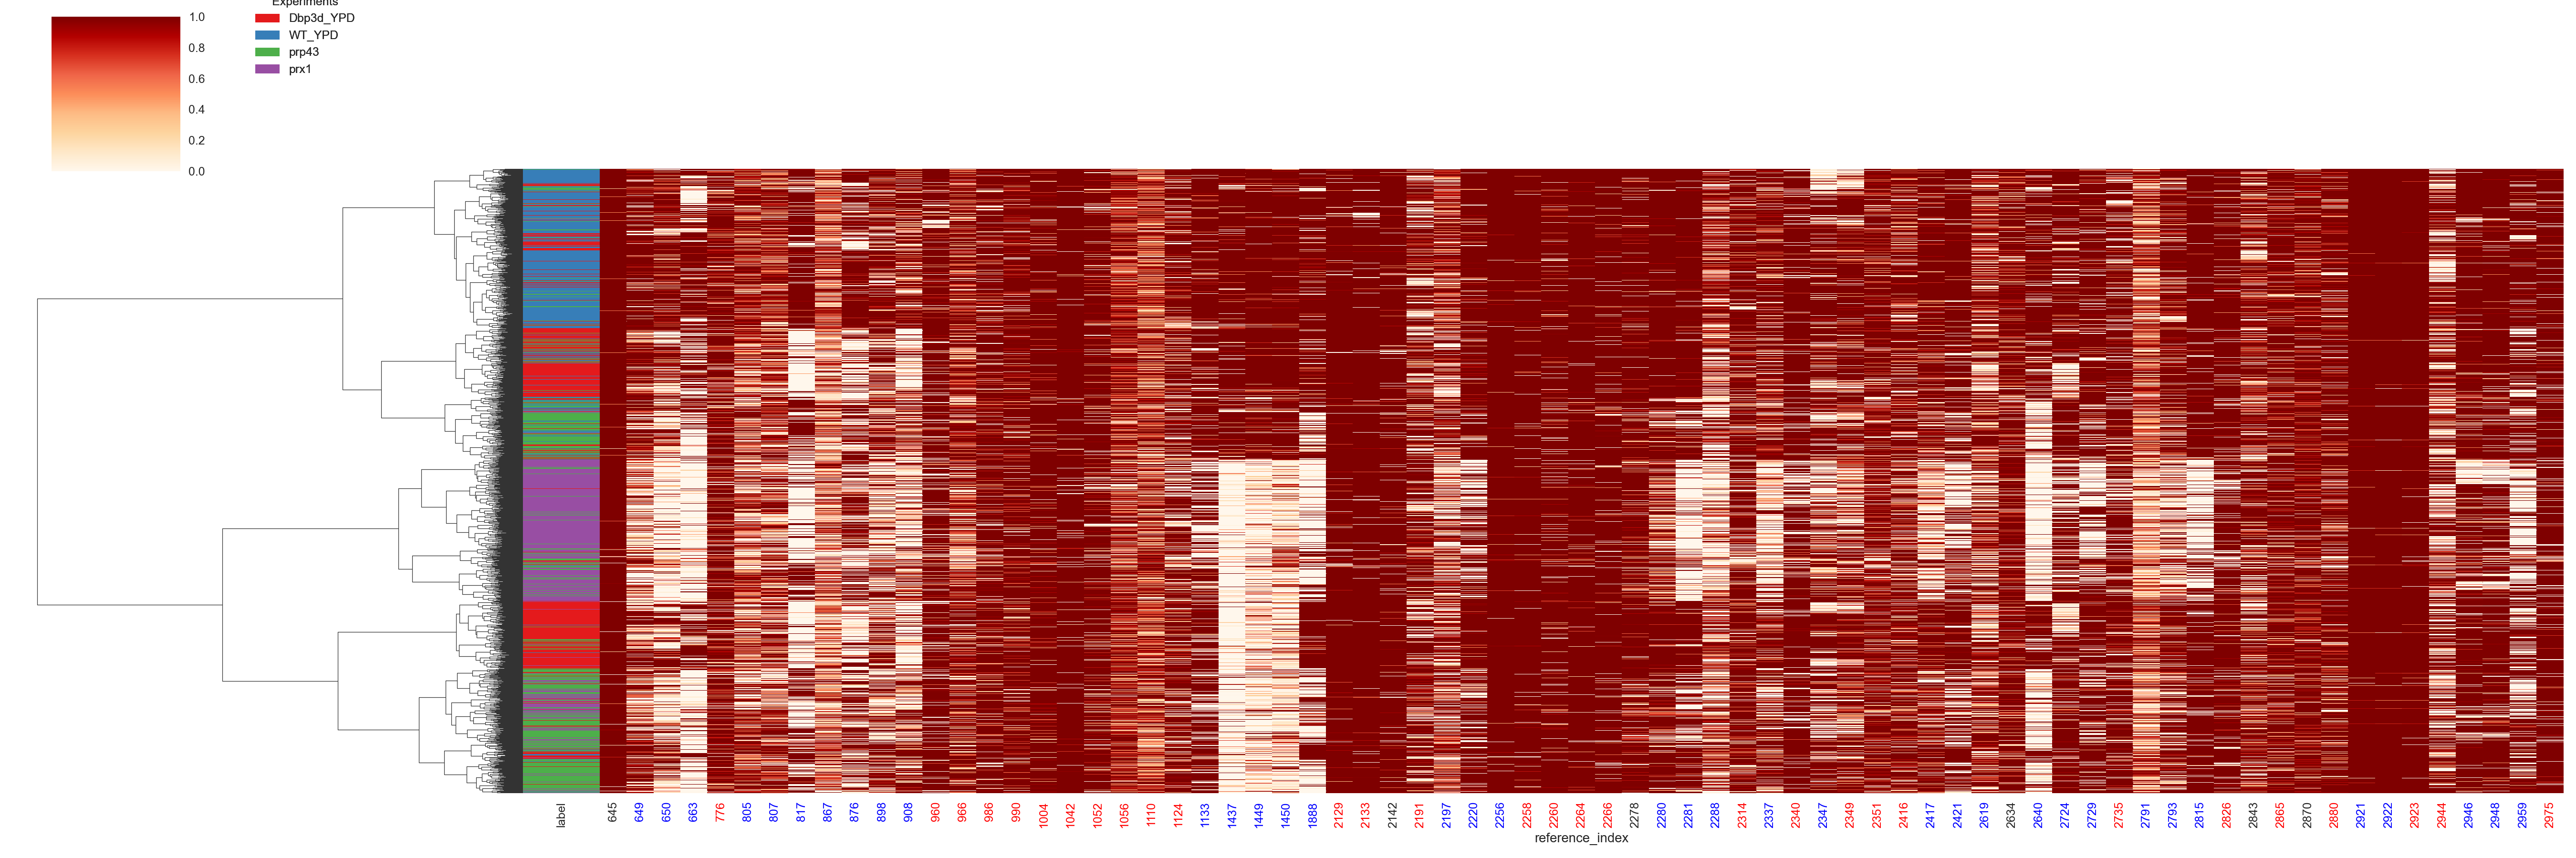

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


In [11]:
%matplotlib notebook

n = 1000
figsize = (30, 10)
save_fig_path = None
metric = "euclidean"
legend = True
method = "ward"

label = None
contig = 'RDN18-1'
contigs = ['RDN18-1', 'RDN25-1']
Path("figures/dbp3_prp43").mkdir(parents=True, exist_ok=True)

for contig in contigs:
#     save_fig_path = None
    save_fig_path = f"figures/dbp3_prp43/{contig}_all_dendrogram.png"
    g = vc.plot_heatmap_dendrogram(contig, vc.get_contig_positions(contig), n=n, figure_path=save_fig_path,
                                   metric=metric,
                                   method=method, 
                                   col_cluster=False,
                                   row_cluster=True,
                                   twoprimeo_pos=None,
                                   pseduo_u_pos=None,
                                   legend=legend,
                                   figsize=figsize)


<IPython.core.display.Javascript object>


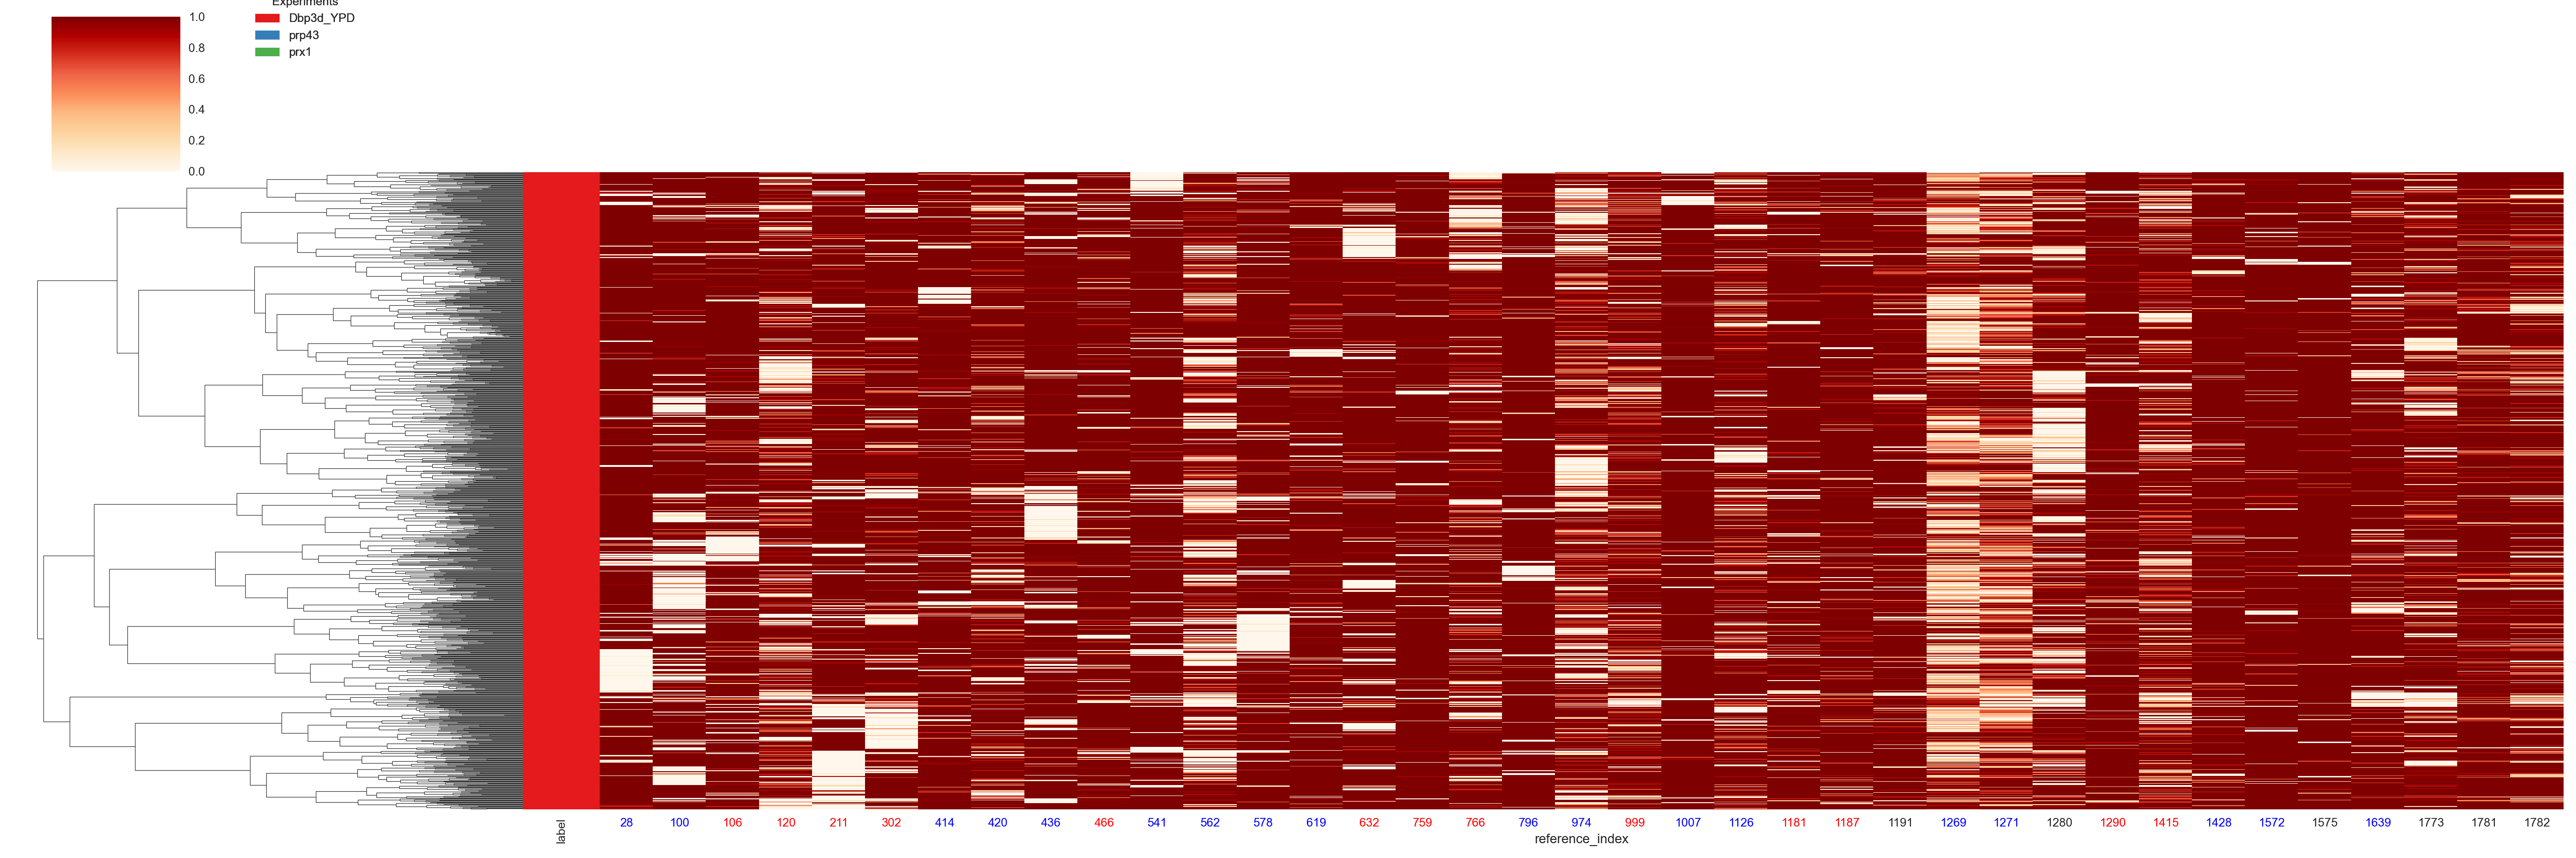

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<IPython.core.display.Javascript object>


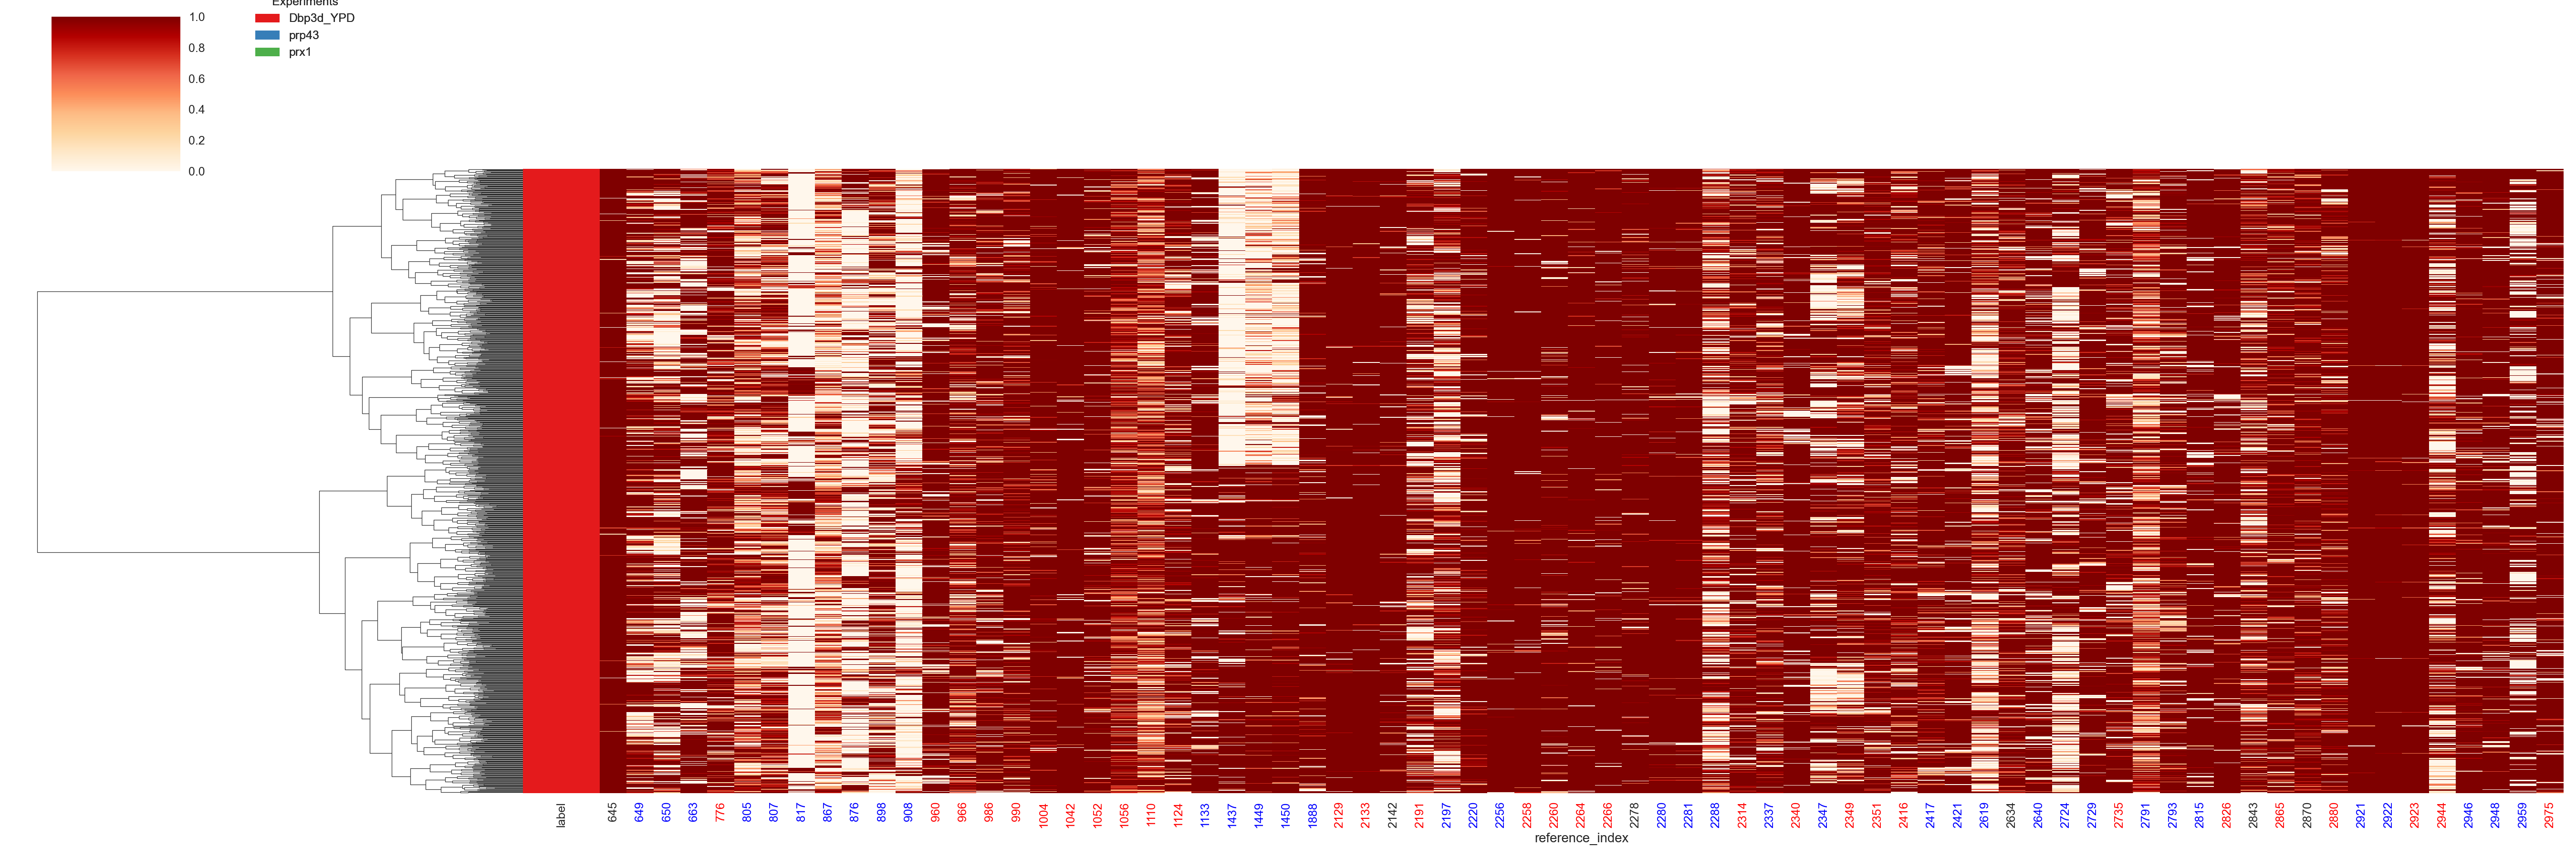

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<IPython.core.display.Javascript object>


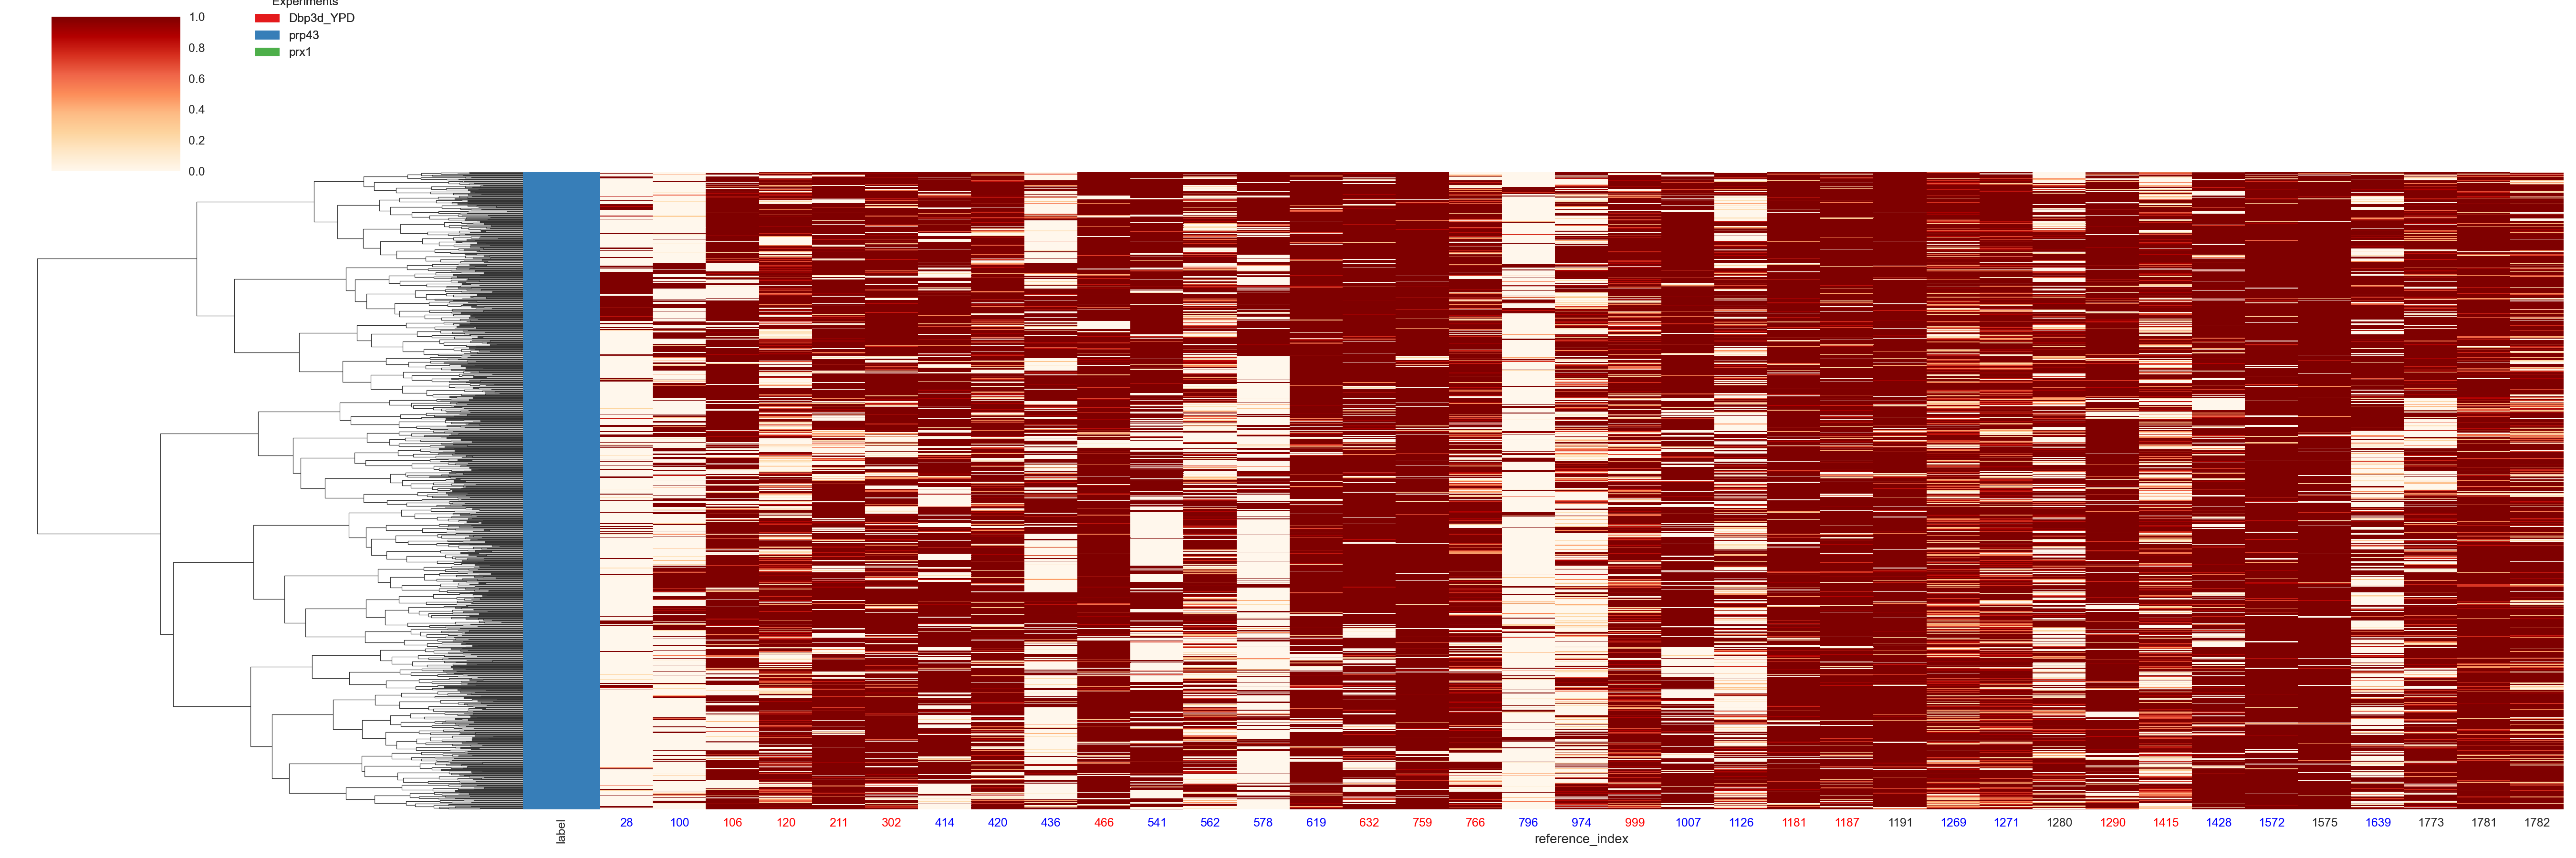

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<IPython.core.display.Javascript object>


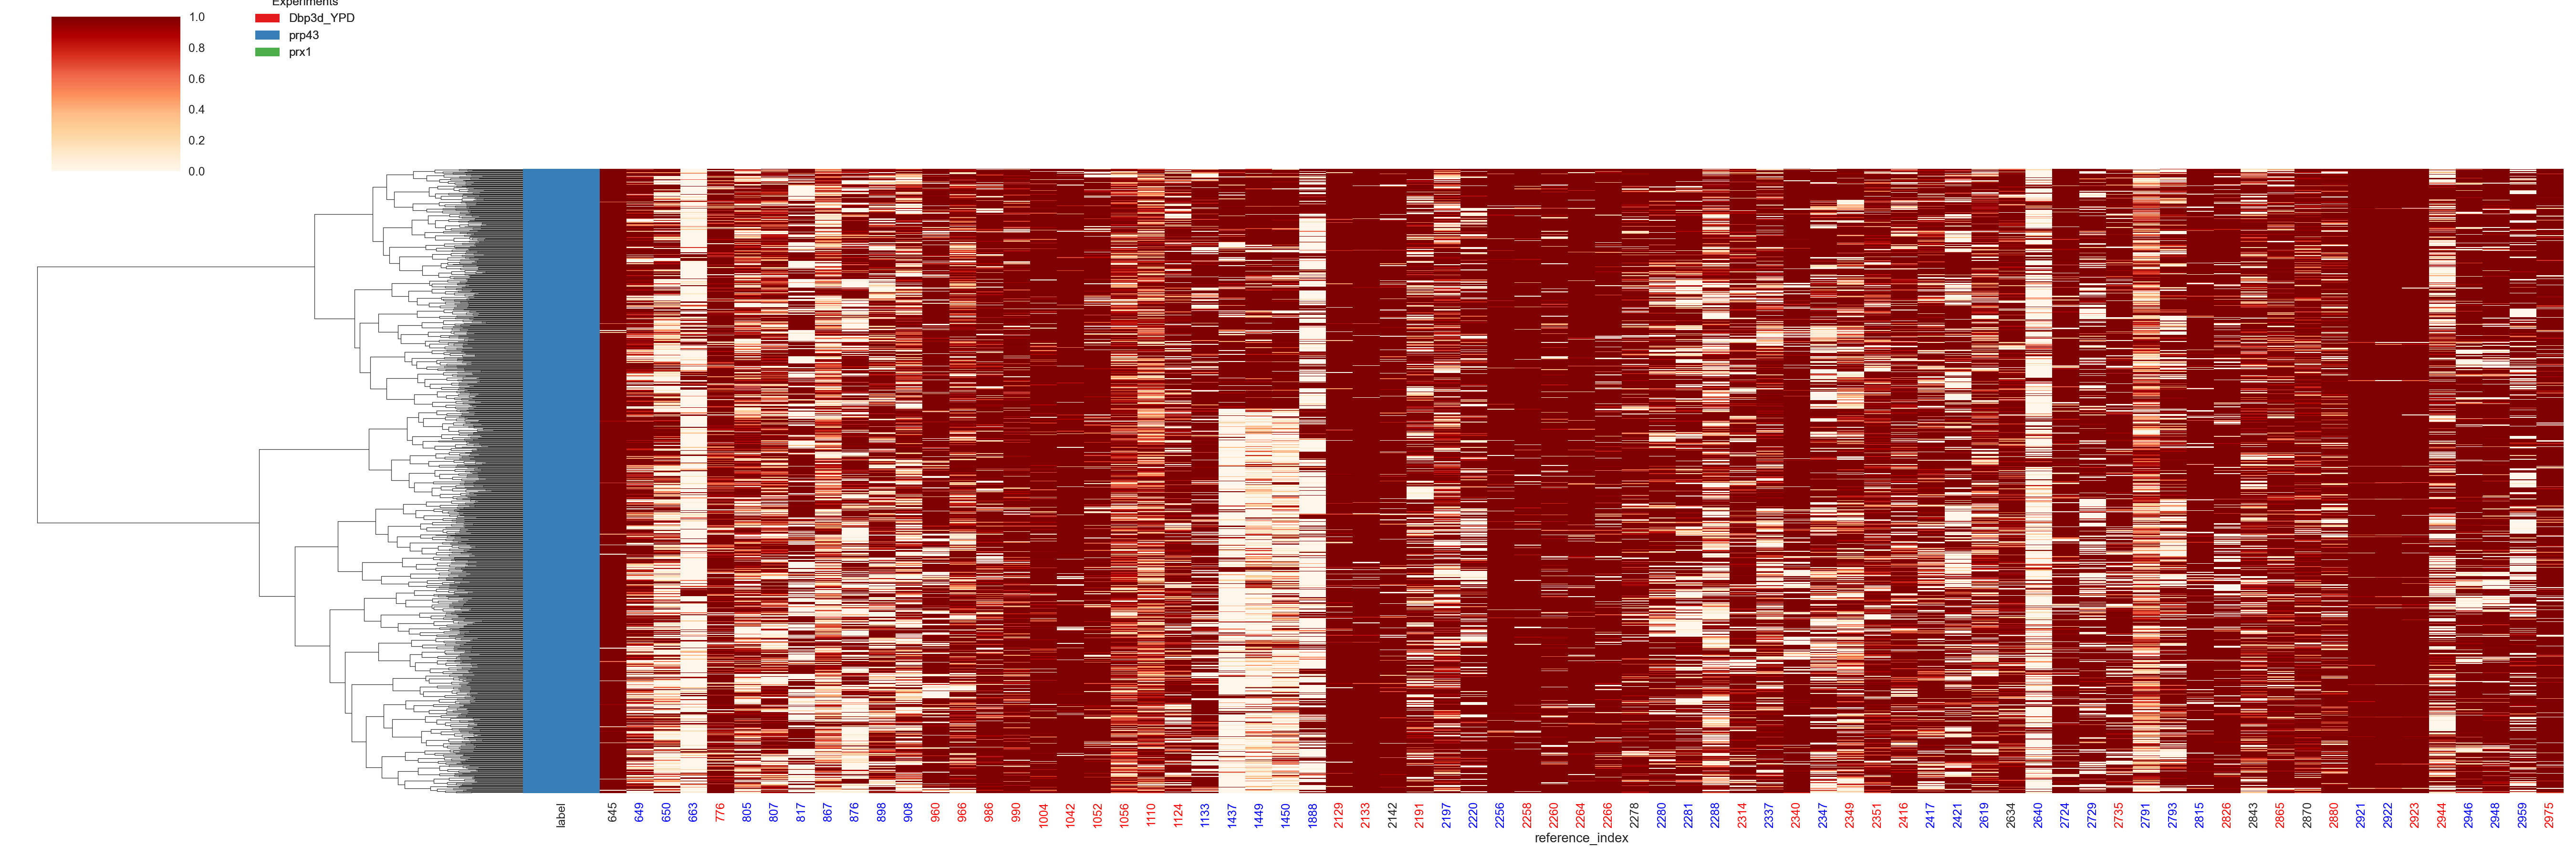

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<IPython.core.display.Javascript object>


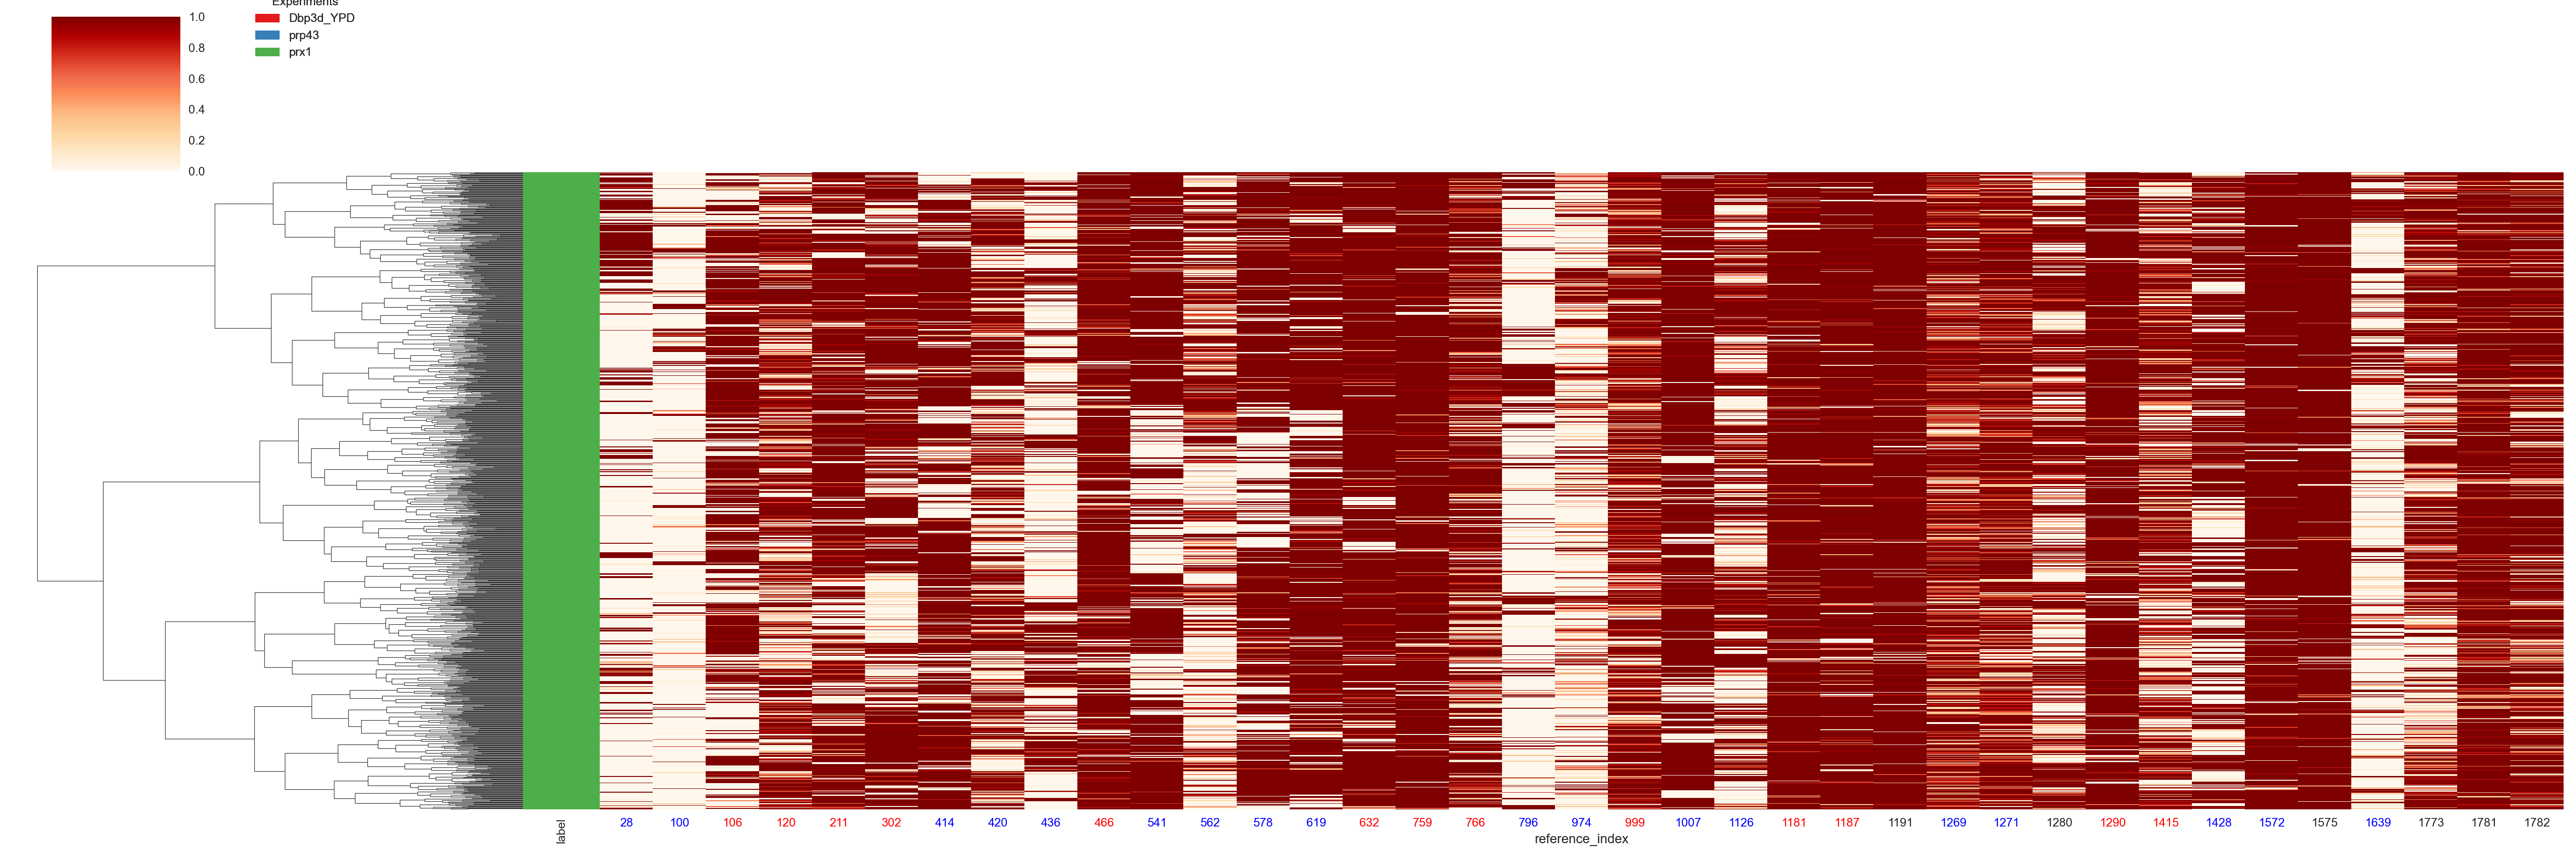

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<IPython.core.display.Javascript object>


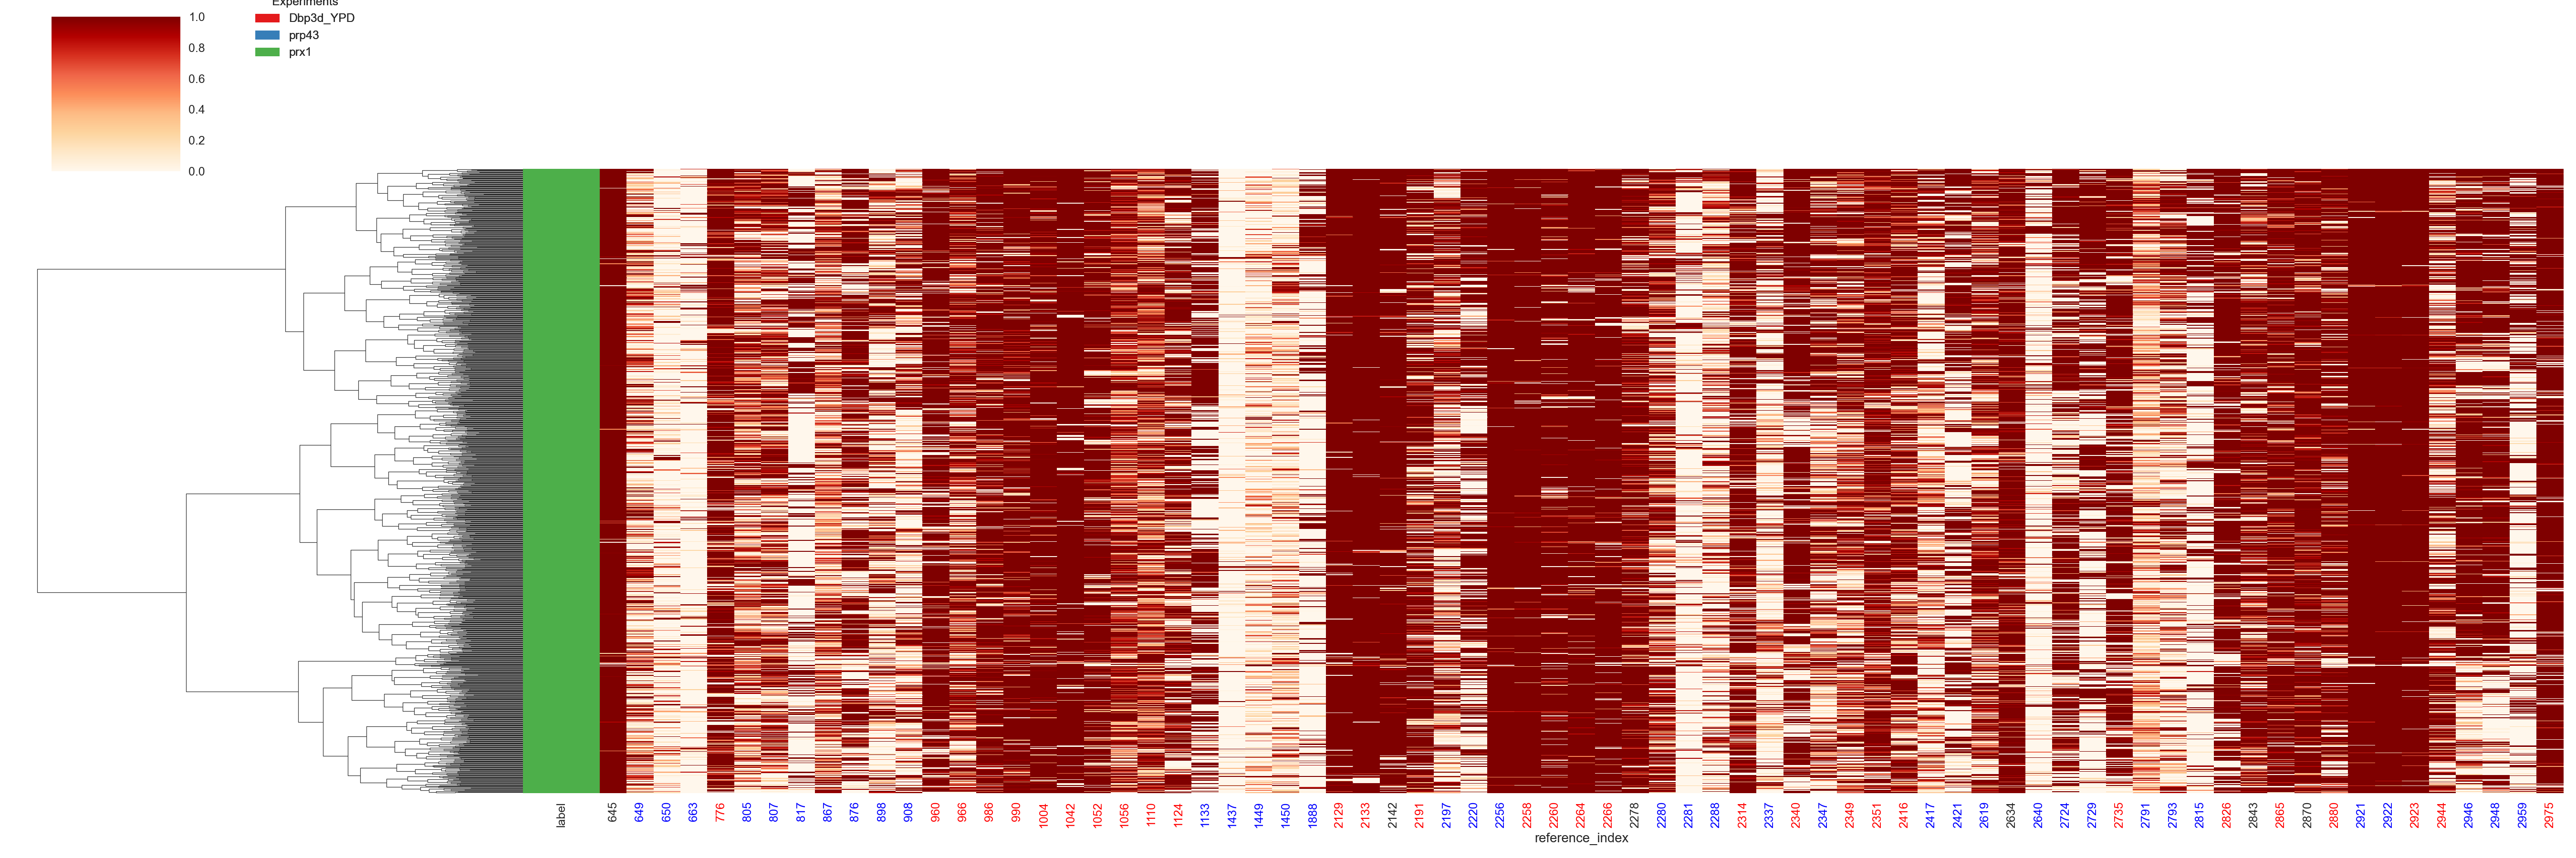

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


In [6]:
%matplotlib notebook

n = 1000
figsize = (30, 10)
save_fig_path = None
metric = "euclidean"
legend = True
method = "ward"

label = None
contig = 'RDN18-1'
contigs = ['RDN18-1', 'RDN25-1']
Path("figures/dbp3_prp43").mkdir(parents=True, exist_ok=True)
all_labels = ["Dbp3d_YPD", "prp43", "prx1"] 

for label in all_labels:
    for contig in contigs:
    #     save_fig_path = None
        save_fig_path = f"figures/dbp3_prp43/{contig}_{label}_dendrogram.png"
        try:
            g = vc.plot_heatmap_dendrogram(contig, vc.get_contig_positions(contig), n=n, figure_path=save_fig_path,
                                           metric=metric,
                                           method=method, 
                                           label=label,
                                           col_cluster=False,
                                           row_cluster=True,
                                           twoprimeo_pos=None,
                                           pseduo_u_pos=None,
                                           legend=legend,
                                           figsize=figsize)
        except:
            pass

In [ ]:
# snoRNA mix 
all_file_paths = [WT_YPD, sqs1d_YPD, Dbp3d_YPD, prp43] 
all_labels = ["4WT_YPD", "3sqs1d_YPD", "1Dbp3d_YPD", "2prp43"] 
vc = VariantCalls(all_file_paths, all_labels, color_map="Set1")


<IPython.core.display.Javascript object>


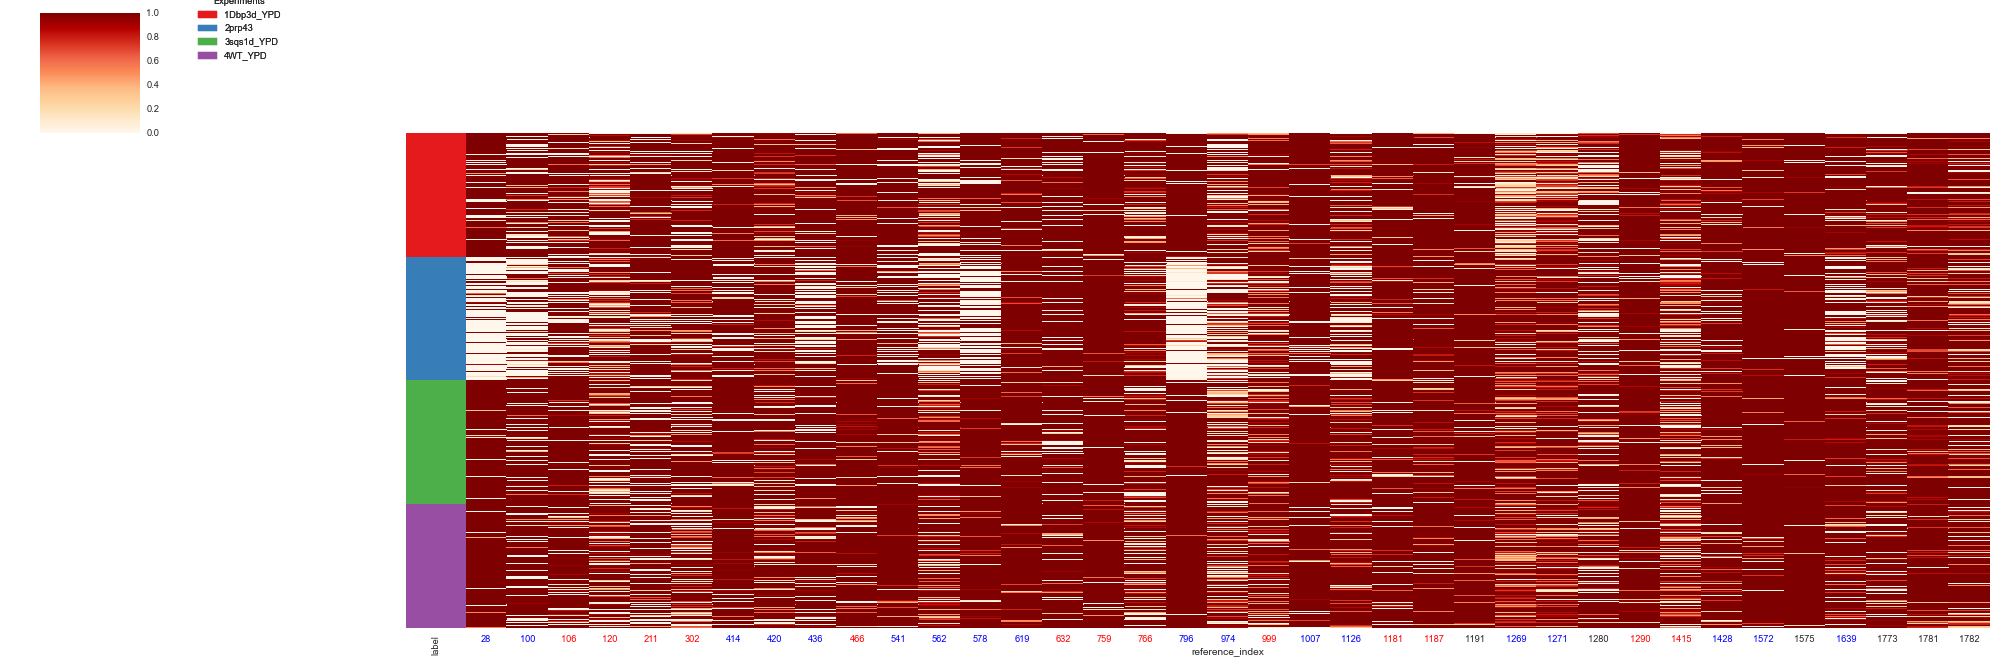

<IPython.core.display.Javascript object>


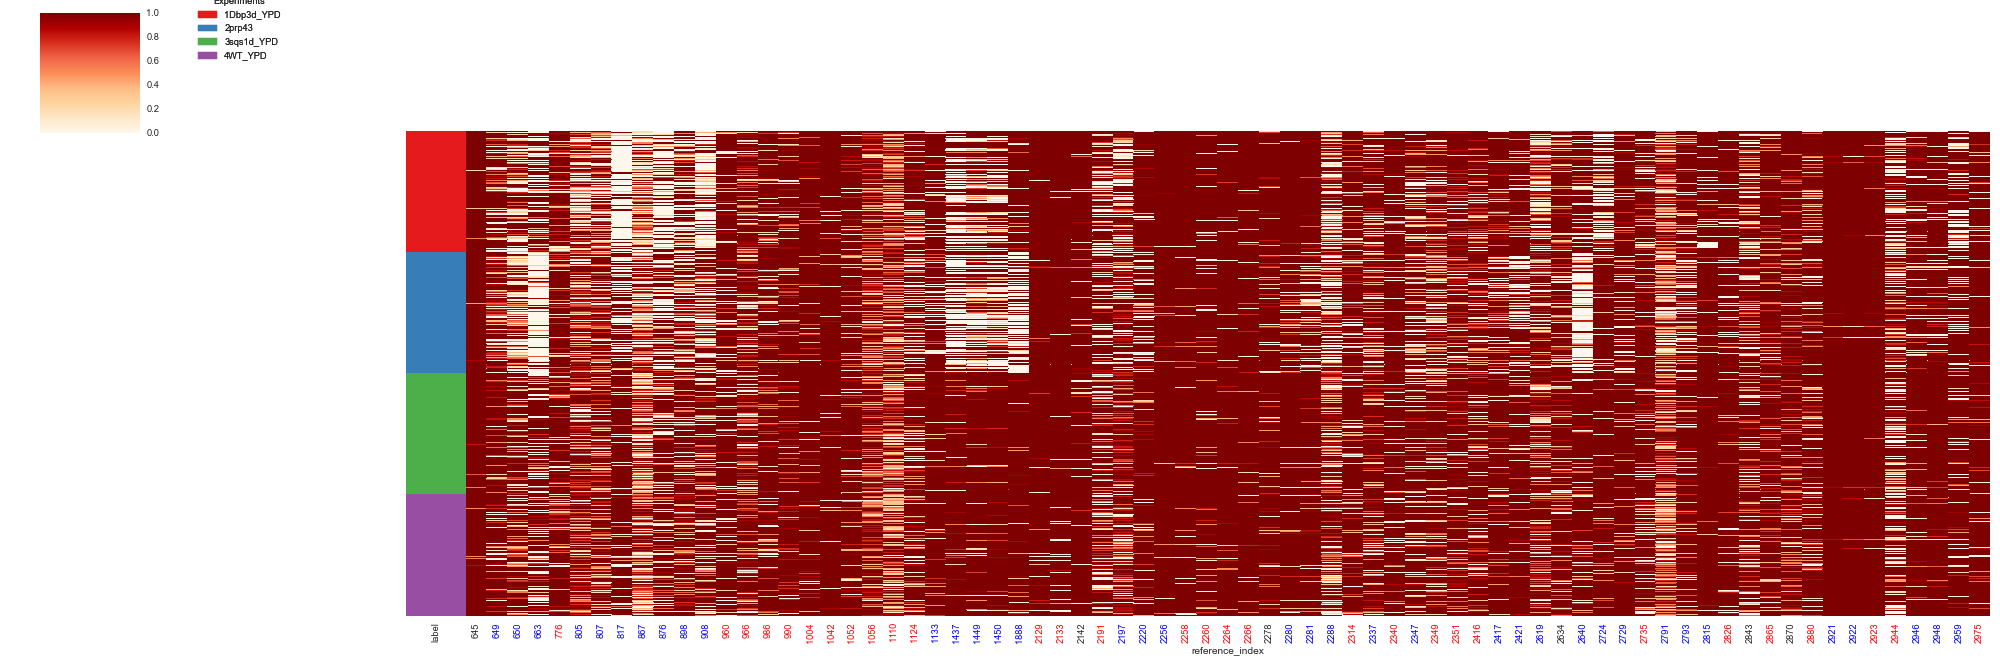

In [10]:
%matplotlib notebook

n = 1000
figsize = (30, 10)
save_fig_path = None
metric = "euclidean"
legend = True
method = "ward"

label = None
contig = 'RDN18-1'
contigs = ['RDN18-1', 'RDN25-1']
Path("figures/dbp3_prp43").mkdir(parents=True, exist_ok=True)

for contig in contigs:
#     save_fig_path = None
    save_fig_path = f"figures/dbp3_prp43/{contig}_all_heatmap.png"
    g = vc.plot_heatmap_dendrogram(contig, vc.get_contig_positions(contig), n=n, figure_path=save_fig_path,
                                   metric=metric,
                                   method=method, 
                                   label=label,
                                   col_cluster=False,
                                   row_cluster=False,
                                   twoprimeo_pos=None,
                                   pseduo_u_pos=None,
                                   legend=legend,
                                   figsize=figsize)

# Ribometh-Seq

In [5]:
ribomet_seq_43 = "figures/dbp3_prp43/ribomet_seq.csv"
save_path = "figures/dbp3_prp43"
ribomet_seq = pd.read_csv(ribomet_seq_43)

In [8]:
all_file_paths = [WT_YPD, Dbp3d_YPD]
all_labels = ["wt", "dbp3"]
vc = VariantCalls(all_file_paths, all_labels, color_map="Set1")



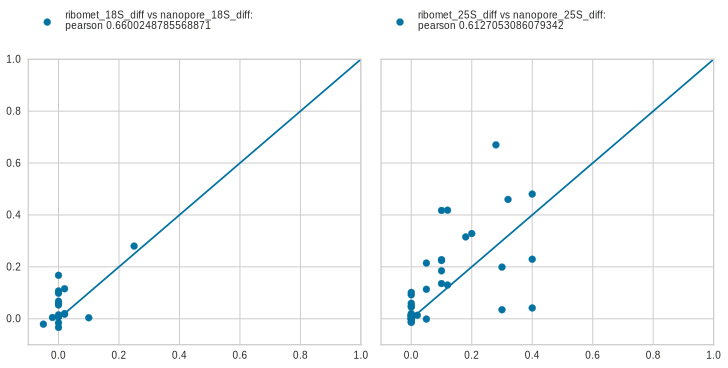

In [10]:
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'
fig, axs = plt.subplots(1,2, figsize=(10, 5), sharey=True, constrained_layout=True)

ribomet_18S_diff = (ribomet_seq["wt"] - ribomet_seq["dbp3"])[ribomet_seq["contig"] == "18S"]
ribomet_25S_diff = (ribomet_seq["wt"] - ribomet_seq["dbp3"])[ribomet_seq["contig"] == "25S"]

contig = "RDN18-1"
prp43 = vc.get_X(contig, vc.get_contig_positions(contig), label="dbp3")
wt = vc.get_X(contig, vc.get_contig_positions(contig), label="wt")
nanopore_18S_diff = wt.mean() - prp43.mean()
nanopore_18S_diff = nanopore_18S_diff[nanopore_18S_diff.index.isin(ribomet_seq[ribomet_seq["contig"] == "18S"]["pos"]-1)]

contig = "RDN25-1"
prp43 = vc.get_X(contig, vc.get_contig_positions(contig), label="dbp3")
wt = vc.get_X(contig, vc.get_contig_positions(contig), label="wt")
nanopore_25S_diff = wt.mean() - prp43.mean()
nanopore_25S_diff = nanopore_25S_diff[nanopore_25S_diff.index.isin(ribomet_seq[ribomet_seq["contig"] == "25S"]["pos"]-1)]

axs[0].scatter(ribomet_18S_diff / 100, nanopore_18S_diff, label=f"ribomet_18S_diff vs nanopore_18S_diff: \n pearson {pearsonr(ribomet_18S_diff / 100, nanopore_18S_diff)[0]}")
x = np.linspace(0, 1)
axs[0].plot(x, x)
axs[0].set_xlim(-0.1, 1)
axs[0].set_ylim(-0.1, 1)

axs[1].scatter(ribomet_25S_diff / 100, nanopore_25S_diff, label=f"ribomet_25S_diff vs nanopore_25S_diff: \n pearson {pearsonr(ribomet_25S_diff / 100, nanopore_25S_diff)[0]}")
x = np.linspace(0, 1)
axs[1].plot(x, x)
axs[1].set_xlim(-0.1, 1)
axs[1].set_ylim(-0.1, 1)

axs[0].legend(bbox_to_anchor=(0, 1.2), loc='upper left')
axs[1].legend(bbox_to_anchor=(0, 1.2), loc='upper left')
figure_path = os.path.join(save_path, "nanopore_vs_ribomet_dbp3.svg")

plt.savefig(figure_path, dpi=1000)

# correlations

In [26]:
from scipy.stats import combine_pvalues
correlation_data = pd.read_csv("figures/summary_data/all_experiment_correlations_corrected_pvalues.csv", index_col=0)


In [27]:
prp43 = []
for index in range(len(correlation_data)):
    data = correlation_data.iloc[index]
    ref_index1 = data["ref_index1"]
    ref_index2 = data["ref_index2"]
    if ref_index1 in [1437, 1449, 1450] and ref_index2 in [1437, 1449, 1450]:
        prp43.append(correlation_data["prp43_corrected_wt_comparison_pvalue"].iloc[index])

statistic, pvalue = combine_pvalues(prp43)
print(statistic, pvalue)


117.30241447087799 6.003919422708124e-23


In [28]:
Dbp3d = []
for index in range(len(correlation_data)):
    data = correlation_data.iloc[index]
    ref_index1 = data["ref_index1"]
    ref_index2 = data["ref_index2"]
    if ref_index1 in [1437, 1449, 1450] and ref_index2 in [1437, 1449, 1450]:
        Dbp3d.append(correlation_data["Dbp3d_YPD_corrected_wt_comparison_pvalue"].iloc[index])

statistic, pvalue = combine_pvalues(Dbp3d)
print(statistic, pvalue)


460.69789812162503 2.444756959894857e-96


In [18]:
(correlation_data["ref_index1"] == 817) & (correlation_data["ref_index2"] == 908)

0       False
1       False
2       False
3       False
4       False
        ...  
3289    False
3290    False
3291    False
3292    False
3293    False
Length: 3294, dtype: bool

In [19]:
correlation_data["Dbp3d_YPD_corrected_wt_comparison_pvalue"][(correlation_data["ref_index1"] == 817) & (correlation_data["ref_index2"] == 908)]

1138    2.422643e-33
Name: Dbp3d_YPD_corrected_wt_comparison_pvalue, dtype: float64

In [20]:
correlation_data["Dbp3d_YPD_corrected_wt_comparison_pvalue"][(correlation_data["ref_index1"] == 2619) & (correlation_data["ref_index2"] == 2724)]

2963    1.333197e-20
Name: Dbp3d_YPD_corrected_wt_comparison_pvalue, dtype: float64

In [21]:
correlation_data["prp43_corrected_wt_comparison_pvalue"][(correlation_data["ref_index1"] == 817) & (correlation_data["ref_index2"] == 908)]

1138    0.327368
Name: prp43_corrected_wt_comparison_pvalue, dtype: float64

In [22]:
correlation_data["prp43_corrected_wt_comparison_pvalue"][(correlation_data["ref_index1"] == 2619) & (correlation_data["ref_index2"] == 2724)]

2963    0.99223
Name: prp43_corrected_wt_comparison_pvalue, dtype: float64

In [23]:
correlation_data["sqs1d_YPD_corr"][correlation_data["sqs1d_YPD_corrected_wt_comparison_pvalue"] < 0.001]

2733    0.632231
3267    0.344813
3273    0.572716
Name: sqs1d_YPD_corr, dtype: float64

In [38]:
correlation_data["WT_YPD_corr"][[2733]]
correlation_data["WT_YPD_corr"][[3267]]
correlation_data["WT_YPD_corr"][[3273]]

print(correlation_data["sqs1d_YPD_corr"][[2733]] - correlation_data["WT_YPD_corr"][[2733]])
print(correlation_data["sqs1d_YPD_corr"][[3267]] - correlation_data["WT_YPD_corr"][[3267]])
print(correlation_data["sqs1d_YPD_corr"][[3273]] - correlation_data["WT_YPD_corr"][[3273]])


2733    0.120322
dtype: float64
3267   -0.204693
dtype: float64
3273   -0.179012
dtype: float64


In [35]:
all_labels = ["CBF5GAL", "CBF5GLU", "NOP58GAL", "NOP58GLU", "IVT", "mutant448", "WT_YPD", "WT_KOAC", "mutant452", "WT_CY", "mutant451", "WT_PB", "WT_stationary", "Dbp3d_YPD", "trl1d_YPD", "WT_rapa5", "Mix", "prp43", "MIX_2", "YS603_18_YEPD", "prp16_18deg_YPD", "spp382_YPD", "R941_YS602_18_YPD", "dbr1d_YPD", "sqs1d_YPD", "snR4d_YPD", "snR45d_YPD", "mutant448_2", "snR4d_alpha_YPD"] 

correlation_data[[f"{x}_corr" for x in all_labels]].loc[2773]

CBF5GAL_corr              0.117762
CBF5GLU_corr             -0.035521
NOP58GAL_corr             0.163897
NOP58GLU_corr             0.085376
IVT_corr                 -0.005379
mutant448_corr           -0.024645
WT_YPD_corr              -0.024608
WT_KOAC_corr              0.022401
mutant452_corr            0.043294
WT_CY_corr                0.029838
mutant451_corr            0.050075
WT_PB_corr                0.001635
WT_stationary_corr       -0.009888
Dbp3d_YPD_corr           -0.029158
trl1d_YPD_corr            0.020178
WT_rapa5_corr             0.060462
Mix_corr                 -0.074243
prp43_corr               -0.027702
MIX_2_corr                0.023371
YS603_18_YEPD_corr        0.002161
prp16_18deg_YPD_corr      0.039977
spp382_YPD_corr           0.034644
R941_YS602_18_YPD_corr    0.022222
dbr1d_YPD_corr            0.017559
sqs1d_YPD_corr           -0.021176
snR4d_YPD_corr           -0.001475
snR45d_YPD_corr          -0.041336
mutant448_2_corr         -0.020166
snR4d_alpha_YPD_corr

In [25]:
print(correlation_data["WT_YPD_corr"][[2773]])

print(correlation_data[["ref_index1", "ref_index2", "contig"]].loc[2733])
print(correlation_data[["ref_index1", "ref_index2", "contig"]].loc[3267])
print(correlation_data[["ref_index1", "ref_index2", "contig"]].loc[3273])

2773   -0.024608
Name: WT_YPD_corr, dtype: float64
ref_index1       2280
ref_index2       2281
contig        RDN25-1
Name: 2733, dtype: object
ref_index1       2921
ref_index2       2923
contig        RDN25-1
Name: 3267, dtype: object
ref_index1       2922
ref_index2       2923
contig        RDN25-1
Name: 3273, dtype: object
